In [54]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [55]:
train_x = np.linspace(0, np.pi*4, 40).reshape(-1, 1)
train_y = np.sin(train_x)

In [56]:
test_x = np.linspace(0, np.pi*4, 120).reshape(-1, 1)
test_y = np.sin(test_x)


In [57]:
input_node = 1
hidden1_node = 3
output_node = 1

In [58]:
model = tf.keras.Sequential([
    #input node = 1 , hidden1_node = 3 , output_node = 1
    tf.keras.layers.Dense(hidden1_node,input_shape = (1, ), activation='sigmoid'),
    tf.keras.layers.Dense(output_node, activation='linear')
])

In [59]:
optimizer_option = {'sgd': tf.keras.optimizers.SGD(lr=0.01),
'momentum': tf.keras.optimizers.SGD(lr=0.1, momentum=0.9),
'RMSProp': tf.keras.optimizers.RMSprop(lr=0.01),
'Adam': tf.keras.optimizers.Adam(lr=0.01)}

In [60]:
result = []

In [61]:
train_y_hat = []
test_y_hat = []

In [62]:
for optimizer_name, optimizer_setting in optimizer_option.items():
    model.compile(optimizer=optimizer_setting, loss='mse', metrics = ['mse'])
    hist = model.fit(train_x, train_y, epochs=10000, verbose = 0)
    result.append(hist)
    train_result = model.predict(train_x)
    train_y_hat.append(train_result)

    test_result = model.predict(test_x)
    test_y_hat.append(test_result)

4/4 [==============================] - 0s 1ms/step


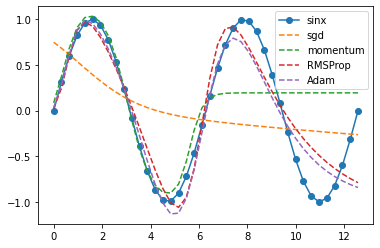

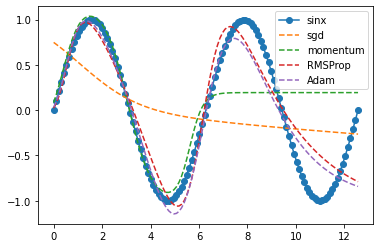

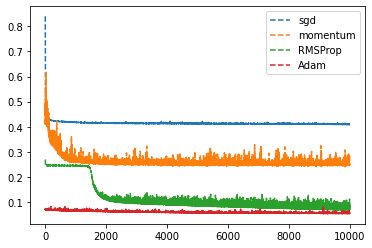

In [63]:
# 혼련 데이터 결과 확인
plt.plot(train_x,train_y, '-o', label = 'sinx')
for i, j in enumerate(optimizer_option.keys()):
    plt.plot(train_x,train_y_hat[i], '--', label = j)
plt.legend(loc = 'upper right')
plt.show()

# 테스트 데이터 결과 확인
plt.plot(test_x,test_y, '-o', label = 'sinx')
for i, j in enumerate(optimizer_option.keys()):
    plt.plot(test_x,test_y_hat[i], '--', label = j)
plt.legend(loc = 'upper right')
plt.show()


# 손실 함수 트렌드 확인
for i, j in enumerate(optimizer_option.keys()):
    plt.plot(result[i].history['loss'], '--', label = j)
plt.legend(loc = 'upper right')
plt.show()

